In [1]:
from Regression import Regression
from Franke import Franke, FrankeNoise

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
import scipy.stats
import time
from imageio import imread
from tqdm import tqdm, trange

mpl.style.use("seaborn-darkgrid")
mpl.rcParams["image.cmap"] = "gnuplot2"
mpl.rcParams["figure.figsize"] = [6.0, 6.0]
mpl.rcParams["font.size"] = 16

np.random.seed(1942)

# Generate data

In [2]:
x,y = np.linspace(0,1,201),np.linspace(0,1,201)
reg = Regression()
reg.generate_generic_data(x,y,FrankeNoise)

In [9]:
lamda = 1e-6
max_iter = 1e4
tol = 1e-4
poly_order = 5
t0 = time.time()
print('-----------------------')
print('Solving coefficients...')
beta = reg.solveCoefficients(poly_order=poly_order,solver='Lasso',lamda=lamda,max_iter=max_iter,tol=tol)
print('Time: ',time.time()-t0)

-----------------------
Solving coefficients...
Cond of XT*X:  26059769.440452732
Time:  0.5883362293243408


/Users/jakobs/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20165.232618067745, tolerance: 4.381903639941162
  positive)


(201, 201)

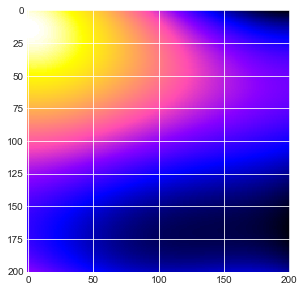

In [6]:
data_pred = reg.apply_model(beta)#,x,y,poly_order)
plt.imshow(data_pred)
data_pred.shape